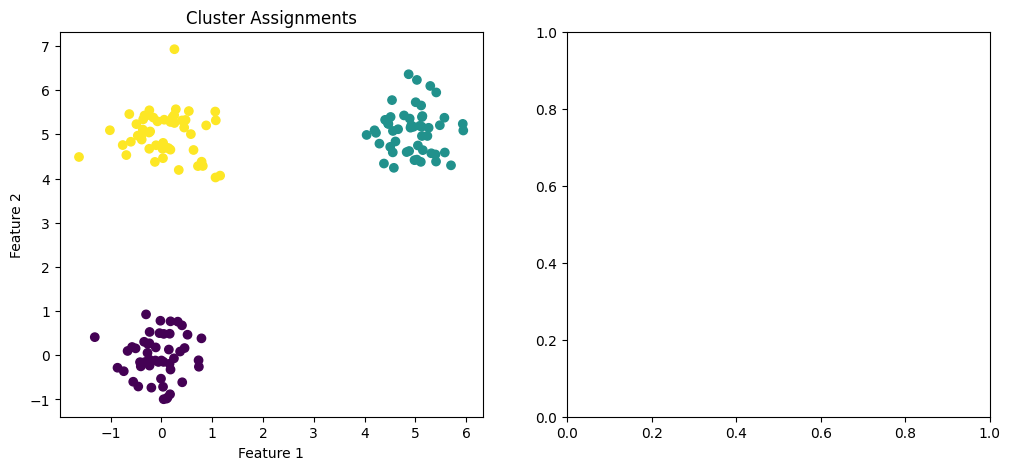

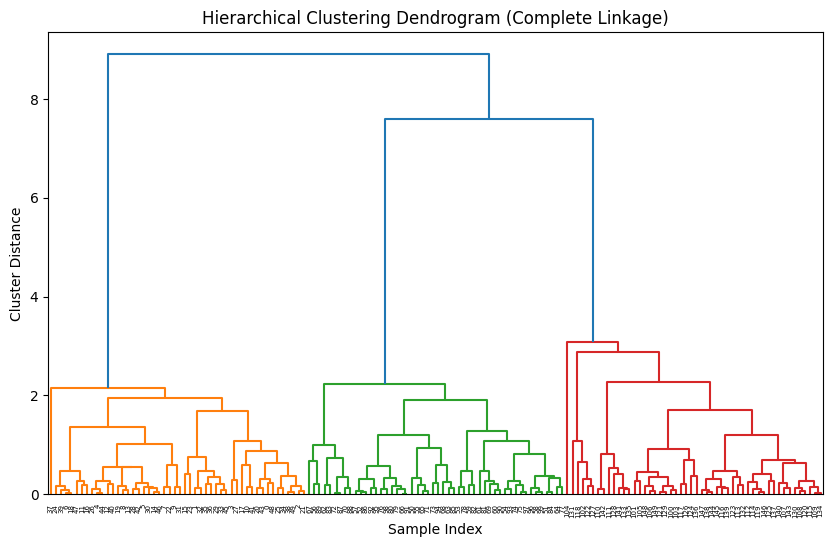

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

class HierarchicalClustering:
    def __init__(self, num_clusters=2, linkage_method='complete'):
        """
        Initialize a hierarchical clustering model.

        Parameters:
        - num_clusters: The number of clusters to form (default: 2)
        - linkage_method: The linkage algorithm to use ('complete', 'single', 'average', etc.)
        """
        self.num_clusters = num_clusters
        self.linkage_method = linkage_method
        self.cluster_labels = None  # Will store the final cluster assignments
        self.linkage_tree = None    # Will store the hierarchical clustering tree

    def fit(self, data_points):
        """
        Perform hierarchical clustering on the input data.

        Parameters:
        - data_points: Input feature matrix (n_samples × n_features)
        """
        # Compute pairwise distances between all data points
        pairwise_distances = pdist(data_points)

        # Build hierarchical clustering tree using specified linkage method
        self.linkage_tree = linkage(pairwise_distances, method=self.linkage_method)

        # Extract cluster assignments by cutting the tree at specified number of clusters
        from scipy.cluster.hierarchy import fcluster
        self.cluster_labels = fcluster(
            self.linkage_tree,
            t=self.num_clusters,
            criterion='maxclust'
        ) - 1  # Convert to 0-based indexing

    def plot_dendrogram(self):
        """
        Visualize the hierarchical clustering dendrogram.

        Raises:
        - ValueError if the model hasn't been fitted yet
        """
        if self.linkage_tree is None:
            raise ValueError("Model must be fitted before plotting.")

        plt.figure(figsize=(10, 6))
        dendrogram(self.linkage_tree)
        plt.title(f'Hierarchical Clustering Dendrogram ({self.linkage_method.capitalize()} Linkage)')
        plt.xlabel('Sample Index')
        plt.ylabel('Cluster Distance')
        plt.show()

# Generate synthetic clustered data
np.random.seed(42)
sample_data = np.concatenate([
    np.random.normal(loc=[0, 0], scale=0.5, size=(50, 2)),  # Cluster 1
    np.random.normal(loc=[5, 5], scale=0.5, size=(50, 2)),  # Cluster 2
    np.random.normal(loc=[0, 5], scale=0.5, size=(50, 2))   # Cluster 3
])

# Create and fit hierarchical clustering model
cluster_model = HierarchicalClustering(
    num_clusters=3,
    linkage_method='complete'
)
cluster_model.fit(sample_data)

# Visualize clustering results
plt.figure(figsize=(12, 5))

# Plot cluster assignments
plt.subplot(1, 2, 1)
plt.scatter(
    sample_data[:, 0],
    sample_data[:, 1],
    c=cluster_model.cluster_labels,
    cmap='viridis'
)
plt.title('Cluster Assignments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot dendrogram
plt.subplot(1, 2, 2)
cluster_model.plot_dendrogram()
plt.tight_layout()
plt.show()